# Week 2

##### Assignment: Explore your data and find a story

For this assignment I've chosen to really get into coding by myself, rather than using a tool with many predefined visualization tools such as Tableau. I like to be able to customize every bit of my software. For this exact reason, I've chosen to use the JavaScript library D3.js (and maybe http://dimplejs.org/ later on) to create my exloratory data visualizations. 


### D3.js

The library has quite a learning curve. I've spent whole days, spread out over multiple weeks to try to get a hang of it. I've read about the first half of 'D3.js By Example' by Michael Heydt, while coding along with the examples. After that, I decided to continue onto the 'Data Visualization and D3.js' course on Udacity to really get familiar with the library. I now feel like I have a good grasp on the essentials, but with an enormous potential to become so much better at visualizing my data by learning more about D3.js, animations for example. 


### The dataset

The first step, obviously, is to have a look at what kind of data we're dealing with.
Allow me to elaborate.

```
time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
"1201232046","2008-01-25","3","0","Scores killed in Pakistan clashes","False","polar","worldnews"
"1201232075","2008-01-25","2","0","Japan resumes refuelling mission","False","polar","worldnews"
"1201232523","2008-01-25","3","0","US presses Egypt on Gaza border","False","polar","worldnews"
"1201233290","2008-01-25","1","0","Jump-start economy: Give health care to all ","False","fadi420","worldnews"
"1201274720","2008-01-25","4","0","Council of Europe bashes EU&UN terror blacklist","False","mhermans","worldnews"
```

This dataset represents some meta data about posts placed on the internetforum Reddit. Every record contains the time on which the post was created, formatted in seconds since 1970 (Epoch format). Then we have the creation date in a human readable format, the amount of up- and downvotes, etc. Pretty self-explanatory. This dataset contains posts from the 'worldnews' subreddit exclusively. 

### Exploration

Let's get started exploring this data!
The first questions which pop into my mind are the following:

#### Have the amount of posts generally increased or decreased from 2008 until 2016?
> What's causing this trend?

(Potential other questions:
What about the amount of up- and downvotes on these posts?
\> What's causing this trend?
)


### Visualization

To create a proper visualization, we will have to convert the data first. We'll need every year with it's respective amount of posts. 

<img src="images/by year.png">

After visualizing by year, the data seems a little limited in amounts. Let's convert the data to show the amount for each quarter instead.

<img src="images/by quarter.png">

Here is the final code for convertion to quarters:

```python
import csv

with open('../data.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)

final_dict = dict()

for item in your_list[1:]:
    year = item[1][0:4]
    month = item[1][5:7]
    if 1 <= int(month) <= 3:
        quarter = 1
    elif 4 <= int(month) <= 6:
        quarter = 2
    elif 7 <= int(month) <= 9:
        quarter = 3
    else:
        quarter = 4
    key = year + '-' + str(quarter)
    final_dict[key] = final_dict.get(key, 0) + 1

print(final_dict)

with open('../posts-by-quarter.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                        quotechar='"', quoting=csv.QUOTE_MINIMAL)

    writer.writerow(['year', 'amount'])
    for key in final_dict:
        writer.writerow([key, final_dict[key]])

```

### Increased

Answering the main question, the amount of posts have generally obviously increased.

# Feedback

After receiving feedback from the teacher, I've decided to re-do the exploration phase. This time I'll be using the better suitable python libraries for exploration, like my teacher advised me to in our conversation.

## '1. Let's have a look at the data'

In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt

# we need the following line to indicate that the plots should be shown inline with the Jupyter notebook.
%matplotlib inline

# df = pd.read_csv('../data/1000-rows.csv', sep=',', low_memory=False, encoding = 'ISO-8859-1')
df = pd.read_csv('../data/data.csv', sep=',', low_memory=False, encoding = 'ISO-8859-1')

df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


We have 8 columns of which 7 are useful. The 'subreddit' column contains the value 'worldnews' in every record.

These are the data types.

In [2]:
# Let's remove the unused column first

df = df.drop(labels='subreddit', axis=1) # axis 1 drops columns, 0 will drop rows that match index value in labels
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans


In [3]:
# The datatypes

df.dtypes

time_created     int64
date_created    object
up_votes         int64
down_votes       int64
title           object
over_18           bool
author          object
dtype: object

## '2. Visuals'

Now that we know what kind of data we're dealing with, let's have a look at the numerical values first.

> In the histogram right below it's made clear that an incredibly high percentage of our records have zero upvotes.

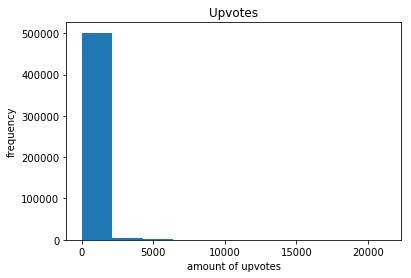

In [4]:
prop = df['up_votes']

plt.hist(prop)
plt.title('Upvotes')
plt.xlabel('amount of upvotes')
plt.ylabel('frequency')

> The visualization below seems to tells us there is there are no downvotes on any of the posts, at all.

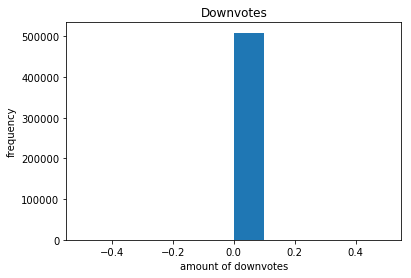

In [5]:
prop = df['down_votes']

plt.hist(prop)
plt.title('Downvotes')
plt.xlabel('amount of downvotes')
plt.ylabel('frequency')

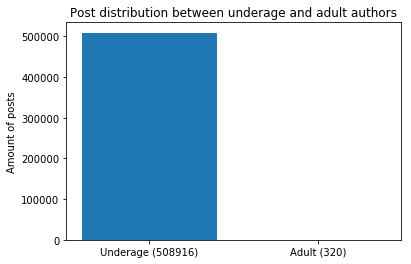

In [6]:
count_result = df.groupby('over_18').count()

underage = count_result.iloc[0][0]
adult = count_result.iloc[1][1]

objects = ('Underage ({})'.format(underage), 'Adult ({})'.format(adult))
y_pos = np.arange(len(objects))
amount_of_posts = [underage, adult]

plt.title('Post distribution between underage and adult authors')
plt.bar(y_pos, amount_of_posts, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Amount of posts')

> This is a rather surprising result. It seems that an incredibly huge majority of the authors on the subreddit of 'worldnews' is underage. 

In [7]:
# Show the dataframe again for development purposes
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans


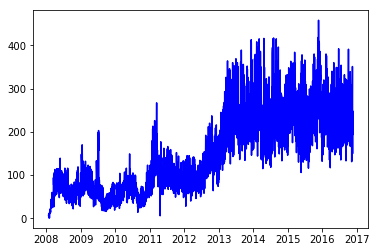

In [8]:
cdf = df.groupby('date_created').size().reset_index(name='counts')

x = cdf.date_created
y = cdf.counts

plt.plot_date(x=x, y=y, fmt='b-')

> Here we can see the trend for the total amount of posts has significantly increased between around 2012 and 2014 especially. 

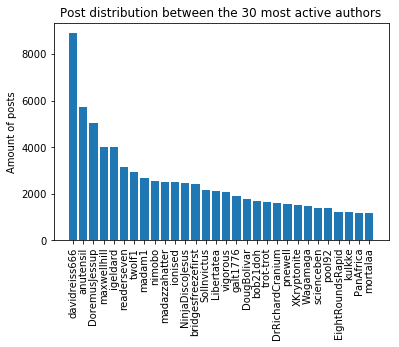

In [9]:
adf = df.groupby('author').size().reset_index(name='counts')
adf = adf.sort_values(by=['counts', 'author'], ascending=False)
adf = adf.head(30)

authors = adf['author']
posts = adf['counts']

y_pos = np.arange(len(authors))

plt.title('Post distribution between the 30 most active authors')
plt.bar(y_pos, posts, align='center')
plt.xticks(y_pos, authors)
plt.xticks(rotation=90)
plt.ylabel('Amount of posts')

> Down below is the distribution of the amount of posts by the 30 most active authors of this subreddit. We can see 'davidreiss666' posting much more often than the other most active authors.

# Date created & authors

## '3. Questions'

### 30 most active authors

The most interesting visualization to me is the distribution of the 30 most active authors. Why is there one author who posts so much more than the second most active author?

A quick google search for the name 'davidreiss666' has taught me that he actually is a reddit moderator, so there's no interesting story behind this outlier here.

### Trend of more posts

The second most interesting visualization to me is the one which shows the trend of the total amount posts. What happened between 2012 and 2014 which has made the total amount of posts in '/r/worldnews' grow so rapidly and stayed much more active consistently after that period?

To answer this question, it could be useful to check the most popular posts in this period of time. 

In [10]:
tdf = df[['date_created', 'up_votes', 'title']]

mask = (tdf['date_created'] > '2012-1-1') & (tdf['date_created'] <= '2014-1-1')
tdf = tdf.loc[mask]

tdf = tdf.sort_values(by='up_votes', ascending=False)

tdf.head(10)

,date_created,up_votes,title
187603,2013-06-08,10159,What we have... is... concrete proof of U.S.-...
206253,2013-08-20,7700,British PM David Cameron told a member of his ...
147907,2012-11-28,7457,"Canada creates $5,000 cap on liability for fil..."
289201,2014-07-16,6889,German footballer Mesut Ozil donated his â¬30...
303557,2014-09-04,6385,After convincing China to give up shark fin so...
234248,2013-12-07,6367,Muslim Patrol jailed for harassing couple ho...
310102,2014-09-26,6037,Hong Kong students storm government HQ to dema...
309732,2014-09-25,5865,"Terror laws clear Senate, enabling entire Aust..."
284595,2014-06-24,5795,Neurotoxic pesticides blamed for the world s b...
280441,2014-06-05,5775,"Quebec passes dying with dignity bill, allow..."


> The titles of these posts still seem very divergent. There's no definitive cause to be concluded from this little research.

> Instead of searching through the most popular posts, let's instead search for the most used words from every post in the period from 2012 to 2014. If we see some keywords used very popularly, we may be able to conclude the cause from the trend of more posts.

In [19]:
# Count the words from every title of every post between 2012 and 2014.
# Sort the words by frequency. 
# Omit stopwords like 'the', 'is', 'and', etc...

# Get all posts from 2012 till 2014.
tdf = df.copy()

# Ensure date_created is a datetime object
tdf['date_created'] = pd.to_datetime(df['date_created'])  

# Create and apply a boolean mask 
mask = (tdf['date_created'] >= '2012-1-1') & (tdf['date_created'] < '2014-1-1')
tdf = tdf.loc[mask]

# Only keep the titles
tdf = tdf[['title']]

titles = tdf['title'].tolist()


# Now count the words
from collections import Counter
from nltk.corpus import stopwords

counts = Counter()
s_words = stopwords.words('english')
s_words.append('-')

for sentence in titles:
    words = [word.strip('.,?!"\'').lower() for word in sentence.split()]
    filtered_words = [w for w in words if w not in s_words]
    counts.update(filtered_words)


In [20]:
most_common = counts.most_common(15)
most_common

L = zip(*most_common)
words, frequency = L

words, frequency

(('syria',
  'new',
  'china',
  'says',
  'us',
  'police',
  'iran',
  'government',
  'president',
  'world',
  'syrian',
  'u.s',
  'north',
  'news',
  'killed'),
 (6880,
  6476,
  6408,
  5772,
  5438,
  4542,
  4312,
  4209,
  4147,
  4145,
  4115,
  3870,
  3865,
  3803,
  3715))

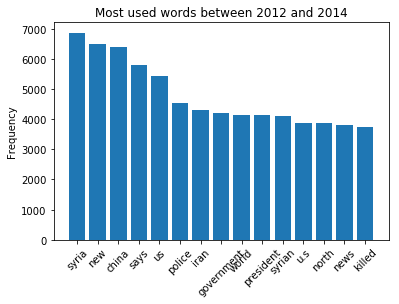

In [14]:
y_pos = np.arange(len(words))

plt.title('Most used words between 2012 and 2014')
plt.bar(y_pos, frequency, align='center')
plt.xticks(y_pos, authors)
plt.xticks(rotation=45)
plt.ylabel('Frequency')

## '4. Conclusions'

It seems that the syria conflict has had a massive impact on the post growth between 2012 and 2014. Closely followed by speculations (look at the word 'says') between China and the U.S. It is worth noticing that both 'us' and 'u.s' are in the top 15 most used words, just like 'syria' and 'syrian'. Thus can be concluded that these two subjects have had the biggest influence to the post growth trend.